<h1 align="center">
  <a href="https://portkey.ai">
    <img width="300" src="https://analyticsindiamag.com/wp-content/uploads/2023/08/Logo-on-white-background.png" alt="portkey">
  </a>
</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1K_DEXMlwdf6JPojDdquv6CbhqoME5mwd?usp=sharing)

## LLM as Judge with Portkey Feedback API


Ensuring the quality and correctness of the LLM's output is crucial for AI applications. One approach to address this challenge is to employ a second LLM as a judge to evaluate the output of the base LLM.



In [ ]:
!pip install -qU portkey-ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


### Quickstart

Feedbacks in Portkey provide a simple way to get weighted feedback from customers on any request you served, at any stage in your app.

You can capture this feedback on a generation or conversation level and analyze it based on custom tags by adding meta data to the relevant request.

In [ ]:
def send_feedback():
  portkey = Portkey(
    api_key=userdata.get('PORTKEY_API_KEY'))

  portkey.feedback.create(
        trace_id= 'f4e93652-ac78-402e-b281-a4fb3b94b3f5', # trace ID of the request
        value= 0, # For thumbs down
        metadata = {"review" : "Response should be less verbose"}
    )

send_feedback()

### Using LLM as judge

`LLM_as_judge` function using Portkey's Feedback API, which demonstrates a novel approach to improving the quality of text generated by LLMs. By employing a second LLM as a judge, we aim to evaluate and ensure the correctness of the generated text.

In [ ]:
from portkey_ai import Portkey
from google.colab import userdata

client = Portkey(
    api_key=userdata.get('PORTKEY_API_KEY')
)

llama3 = Portkey(api_key=userdata.get('PORTKEY_API_KEY'),
                  virtual_key="groq-431005",
                  model = "llama3-70b-8192"
                  )

gemini_1_5_flash = Portkey(api_key=userdata.get('PORTKEY_API_KEY'),
                  virtual_key="google-bb26f3",
                  model = "gemini-1.5-flash"
                  )

gpt_4o = Portkey(api_key=userdata.get('PORTKEY_API_KEY'),
                  virtual_key="gpt3-8070a6",
                  model = "gpt-4o"
                  )

In [ ]:
##
def LLM_as_judge(base_llm, judge_llm, prompt):
  pcompletion = base_llm.chat.completions.create(
    messages=[{"role": "user", "content": prompt}],
  )

  completion = pcompletion.choices[0].message.content
  req_trace = pcompletion.get_headers()['trace-id']

  print(completion)
  print("===================")
  # check_response = f"Check if the response is in correct JSON format or not {completion}. Give response as yes or no."

  check_response = """Evaluate the following response:
                    {}
                    Score each metric from 1 (poor) to 5 (excellent):
                    1. Relevance and Completeness
                    2. Logical Coherence
                    3. Factual Accuracy and Consistency
                    4. Clarity and Comprehensibility

                    Provide an overall score and a brief summary.""".format(completion)


  pfeedback = judge_llm.chat.completions.create(
      messages=[{"role": "user", "content": check_response}],
  )

  feedback = pfeedback.choices[0].message.content

  print(feedback)
  print("===================")

  portkey = Portkey(
    api_key=userdata.get('PORTKEY_API_KEY')
  )

  portkey.feedback.create(
        trace_id= req_trace,
        value= 1,
        metadata = {"review" : feedback}
    )

In [ ]:
LLM_as_judge(base_llm = llama3,
             judge_llm = gpt_4o,
             prompt= "If 20 shirts take 5 hours to dry, how much time will 100 shirts take to dry?"
             )

Given that the drying rate seems to be consistent, we can determine the time required for 100 shirts based on the given information.

First, let's find out how long it takes for one shirt to dry:
1 shirt = Total time / Number of shirts
1 shirt = 5 hours / 20 shirts
1 shirt = 0.25 hours

Now that we know it takes 0.25 hours (or 15 minutes) to dry one shirt, we can calculate the time required for 100 shirts:

Time for 100 shirts = Time per shirt * Number of shirts
Time for 100 shirts = 0.25 hours * 100 shirts
Time for 100 shirts = 25 hours

So, it will take 25 hours for 100 shirts to dry if the drying rate remains constant.
1. Relevance and Completeness: 5 - The response addresses the specific question of determining the time required for drying 100 shirts based on the given information.
2. Logical Coherence: 5 - The response follows a logical step-by-step process to calculate the time required for drying 100 shirts.
3. Factual Accuracy and Consistency: 5 - The calculations for determini

### Feedback

Portkey provides a convenient way to view feedback on API calls. The feedback section displays both the request and the assistant's response, along with their respective token counts. Users can review the original prompt and the generated response. This feedback mechanism allows developers to assess the quality and effectiveness of the generated responses, enabling iterative improvements to the API and the underlying language models.

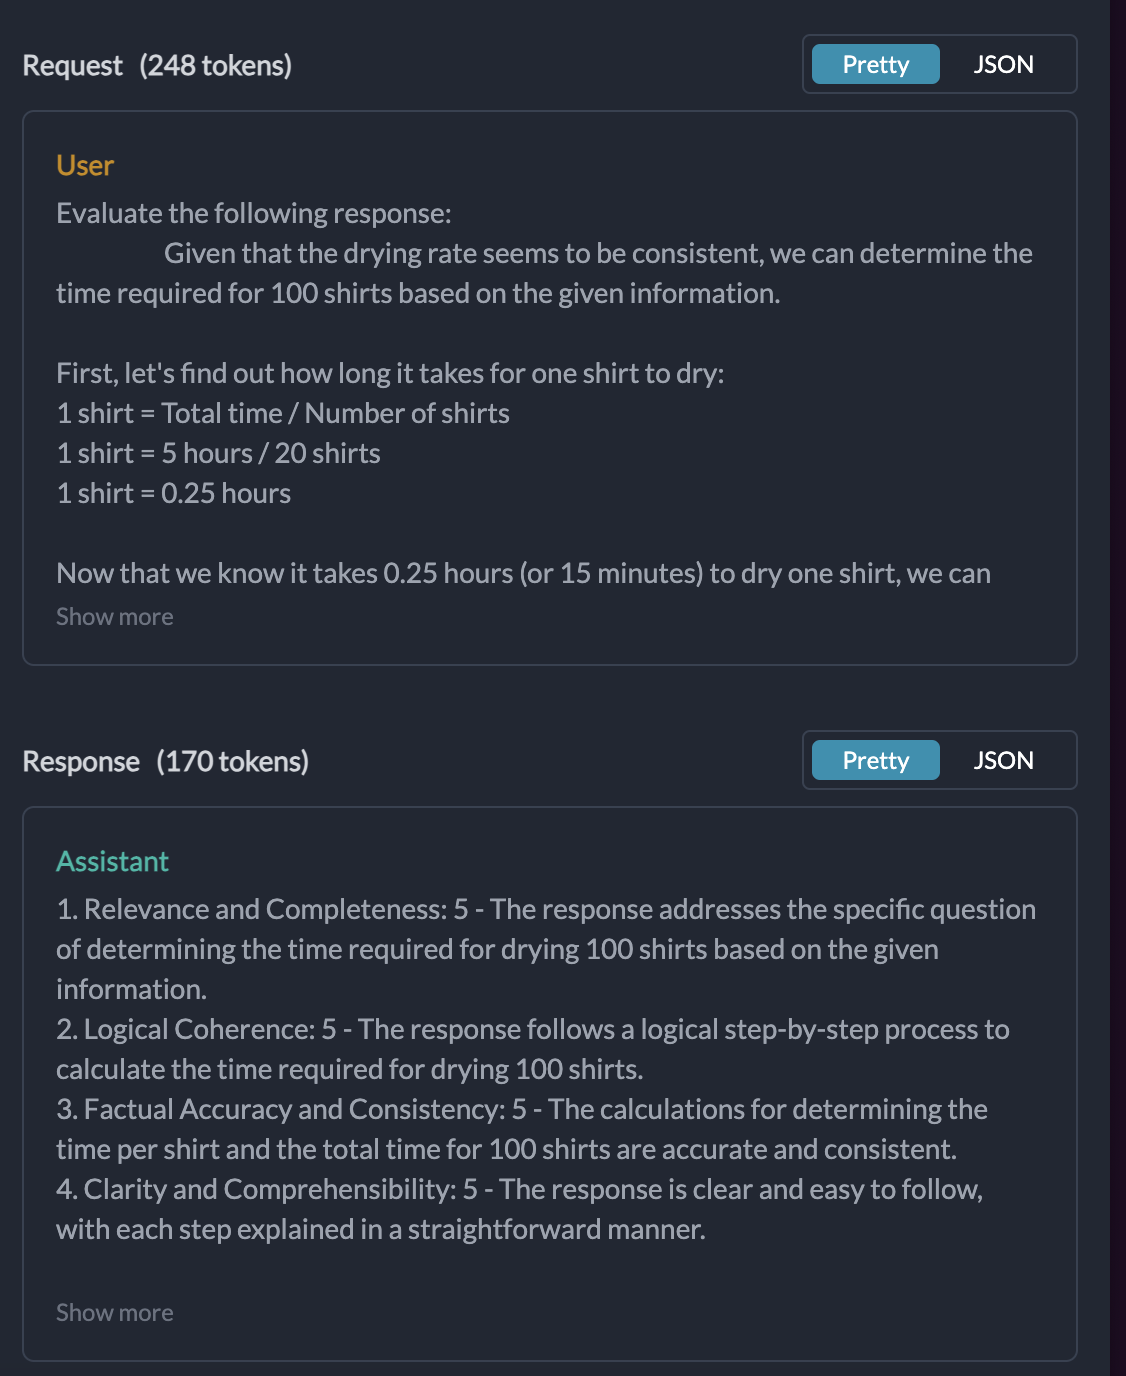